# ASSIGNMENT 4.1
## Submitted by: FARHAN ASIF (A23052200097)

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
import warnings
warnings.filterwarnings('ignore')

In [31]:
dataset = pd. read_csv('cereal.csv')

In [32]:
dataset.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [34]:
cereals = dataset. drop (columns= ['name', 'rating' ])

In [35]:
cereals = cereals.drop([57])

In [40]:
from sklearn.preprocessing import LabelEncoder
cereals['mfr'] = LabelEncoder().fit_transform(cereals ['mfr'])
cereals['type'] = LabelEncoder(). fit_transform(cereals ['type'])

In [42]:
from sklearn.preprocessing import StandardScaler
standardizer = StandardScaler()
standardizer.fit (cereals)
std_x = standardizer.transform(cereals)
std_cereals = pd.DataFrame (std_x, columns=cereals. columns)
std_cereals.head()

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups
0,0.177054,-0.164399,-1.899212,1.406034,0.0,-0.388559,3.297034,-2.525453,-0.235948,2.583256,-0.163706,0.945848,-0.199418,-2.124547
1,1.347151,-0.164399,0.669118,0.460383,4.0,-1.794771,-0.060749,-1.752563,0.223848,0.548702,-1.294763,0.945848,-0.199418,0.762614
2,-0.407994,-0.164399,-1.899212,1.406034,0.0,1.201073,2.877312,-2.010193,-0.465846,3.144512,-0.163706,0.945848,-0.199418,-2.124547
3,-0.407994,-0.164399,-2.926544,1.406034,-1.0,-0.266279,4.975926,-1.752563,-1.615336,3.284826,-0.163706,0.945848,-0.199418,-1.391984
4,1.932199,-0.164399,0.155452,-0.485268,1.0,0.467397,-0.480472,-0.206782,0.223848,-1.359570,-0.163706,0.945848,-0.199418,-0.314685


### K-Means Clustering 
(k=5)

In [45]:
from sklearn.cluster import KMeans

_5means = KMeans (n_clusters = 5, random_state=1)
_5means.fit (std_cereals)
_5means_clusters =_5means.predict (std_cereals)

In [46]:
cereals ['cluster_5'] = _5means_clusters
cereals.groupby('cluster_5').mean()

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups
cluster_5,,,,,,,,,,,,,,
0,2.280000,0.000000,110.800000,1.720000,1.280000,161.400000,0.780000,12.260000,10.880000,54.960000,24.000000,1.960000,1.000000,0.845200
1,4.117647,0.000000,91.176471,2.647059,0.529412,89.117647,2.647059,15.058824,3.588235,100.588235,17.647059,2.235294,0.931176,0.707647
2,2.333333,0.000000,63.333333,4.000000,0.666667,176.666667,11.000000,6.666667,3.666667,310.000000,25.000000,3.000000,1.000000,0.386667
3,2.692308,0.000000,133.076923,3.153846,1.769231,177.307692,3.576923,15.192308,10.615385,171.153846,36.538462,2.923077,1.265385,0.738462
4,2.000000,0.111111,105.000000,2.777778,0.555556,217.222222,1.055556,19.166667,2.888889,58.277778,40.277778,1.944444,1.000000,1.035000


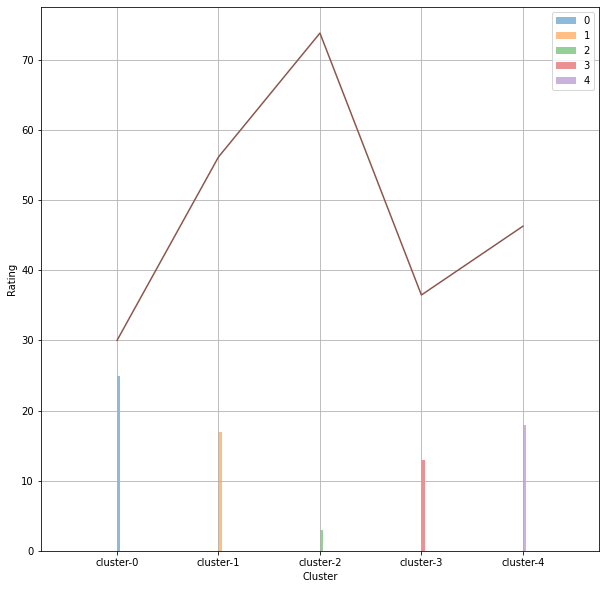

In [53]:
predict_rating = pd.DataFrame (dataset ['rating'].drop (57), columns=['rating'])
predict_rating['cluster_5'] =_5means_clusters
predict_rating.groupby('cluster_5')['cluster_5'].hist(bins=30,alpha=0.5,figsize=(10,10),legend=True)
plt.plot(predict_rating.groupby('cluster_5') ['rating'].mean()) 
plt.xticks( [0,1,2,3,4], ['cluster-0', 'cluster-1', 'cluster-2', 'cluster-3', 'cluster-4'])
plt.xlabel('Cluster') 
plt.ylabel('Rating')
plt.show()

##### Rating
1. Cluster 2 has lowest number of items and the highest rating amongst all.
2. Cluster 0 has highest number of items and the lowest rating amongst all.

##### Characterstics
1. Cluster 2 has the lowest average calorie, fats, carbohydrates, and sugars. It also has the highest average vitamins, protien, fibre and sodium.
2. Cluster 3 corresponds to the cereals with highest calories.
3. Cluster 4 corresponds to the cereals with highest carbs.
4. Cluster 1 corresponds to the cereals with lowest fat content.
5. Cluster 0 corresponds to the cereals with lowest fibre and highest sugar.

### K-Means 
(k = 3)

In [57]:
from sklearn.cluster import KMeans

_3means = KMeans (n_clusters = 3, random_state=1)
_3means. fit (std_cereals)
_3means_clusters= _3means.predict(std_cereals)

In [59]:
cereals['cluster_3'] = _3means_clusters
cereals.drop('cluster_5', axis=1).groupby('cluster_3').mean()

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups
cluster_3,,,,,,,,,,,,,,
0,3.291667,0.083333,95.416667,2.708333,0.291667,134.791667,1.875000,17.416667,2.708333,76.000000,18.750000,1.833333,0.95125,0.885000
1,2.913043,0.000000,115.652174,3.304348,1.739130,160.869565,4.260870,13.086957,8.391304,175.217391,30.434783,2.913043,1.15000,0.649130
2,2.034483,0.000000,109.655172,1.724138,1.000000,184.827586,0.689655,14.000000,9.517241,49.448276,35.344828,2.000000,1.00000,0.909655


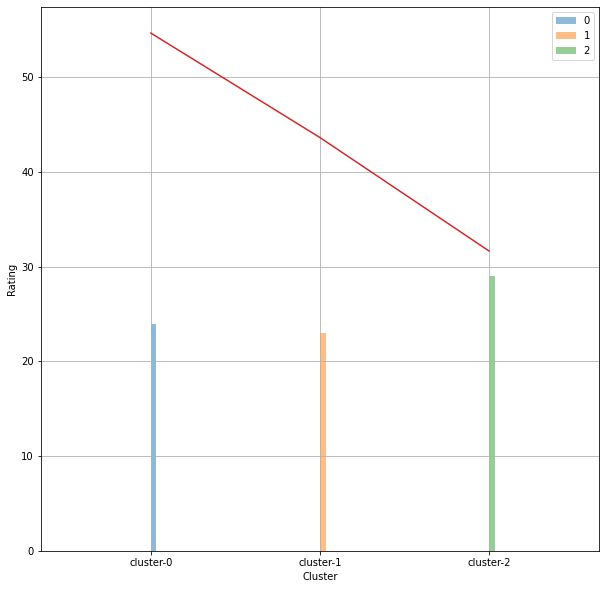

In [61]:
predict_rating = pd.DataFrame (dataset ['rating'].drop (57), columns=['rating'])
predict_rating['cluster_3'] = _3means_clusters

predict_rating.groupby('cluster_3')['cluster_3'].hist(bins=30,alpha=0.5,figsize=(10,10),legend=True)
plt.plot(predict_rating.groupby('cluster_3') ['rating'].mean())
plt.xticks ([0,1,2], ['cluster-0','cluster-1','cluster-2']) 
plt.xlabel('Cluster') 
plt.ylabel ('Rating')
plt.show()

##### Rating
1. Cluster 0 has the highest rating
2. Cluster 2 has highest number of items and the lowest rating amongst all.

##### Characterstics
1. Cluster O corresponds to the cereals having lowest amount of calories, sugars, fat and average amount of fibre, protien and vitamins.
2. Cluster 1 corresponds to the cereals with high calorie, protien, fiber, sodium, fat, potassium, vitamin and sugar.
3. Cluster 2 corresponds to cereals having high amount of sugar, vitamins, and sodium.

###### Which Solution is better?
K=3 gives better clustering than k=5 since the clusters in k=5 have lower over all density while the feature relation is approximately same. while on the other hand, Clusters with k=3 gives a better distinction amongst the features and better explaination of the ratings.

## DBSCAN 

In [68]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN (eps=3, min_samples=3)
y_dbscan_clusters = dbscan.fit_predict(std_cereals)

cereals ['cluster_DBSCAN'] = y_dbscan_clusters
cereals.drop( ['cluster_5', 'cluster_3'], axis=1).groupby('cluster_DBSCAN').mean ()

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups
cluster_DBSCAN,,,,,,,,,,,,,,
-1,3.272727,0.181818,110.909091,3.545455,1.454545,110.909091,1.727273,15.272727,5.454545,101.727273,29.545455,2.454545,0.981818,1.000000
0,2.333333,0.000000,63.333333,4.000000,0.666667,176.666667,11.000000,6.666667,3.666667,310.000000,25.000000,3.000000,1.000000,0.386667
1,2.689655,0.000000,108.620690,2.241379,0.948276,166.465517,1.827586,14.879310,7.724138,86.017241,23.706897,2.086207,1.042759,0.799828
2,1.500000,0.000000,105.000000,2.500000,0.750000,222.500000,1.250000,18.500000,3.750000,62.500000,100.000000,3.000000,1.000000,1.000000


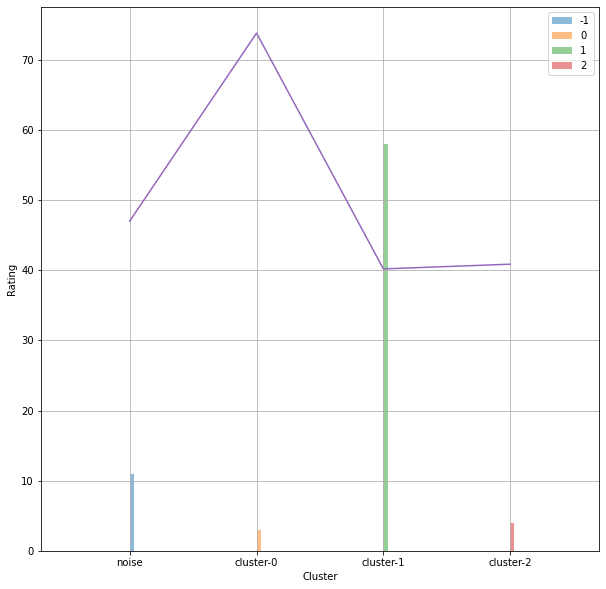

In [73]:
predict_rating = pd.DataFrame (dataset ['rating'].drop (57), columns=['rating'])
predict_rating['cluster_DBSCAN'] = y_dbscan_clusters

predict_rating.groupby('cluster_DBSCAN')['cluster_DBSCAN'].hist(bins=30,alpha=0.5,figsize=(10,10),legend=True) 
plt.plot(predict_rating.groupby('cluster_DBSCAN')['rating'].mean ())
plt.xticks([-1,0,1,2],['noise','cluster-0','cluster-1','cluster-2']) 
plt.xlabel('Cluster')
plt.ylabel ('Rating')
plt. show()

## Agglomerative

In [77]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering()
y_agg_clusters = agg. fit_predict (std_cereals)
cereals ['cluster_agg'] = y_agg_clusters
cereals.drop( ['cluster_5', 'cluster_3', 'cluster_DBSCAN'], axis=1).groupby ('cluster_agg').mean ()

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups
cluster_agg,,,,,,,,,,,,,,
0,3.210526,0.000000,105.000000,2.947368,1.157895,130.394737,3.578947,14.052632,6.447368,143.552632,25.000000,2.631579,1.06,0.698421
1,2.184211,0.052632,108.947368,2.078947,0.842105,193.157895,0.710526,15.552632,7.605263,48.236842,32.236842,1.815789,1.00,0.947632


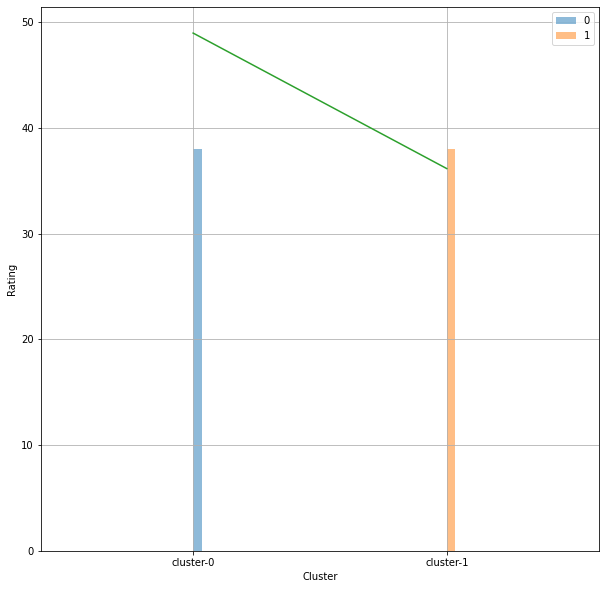

In [79]:
predict_rating = pd.DataFrame (dataset ['rating']. drop (57), columns=['rating'])
predict_rating['cluster_agg'] = y_agg_clusters 
predict_rating.groupby('cluster_agg') ['cluster_agg'].hist(bins=30, alpha=0.5, figsize=(10,10), legend=True) 
plt.plot(predict_rating.groupby('cluster_agg')['rating'].mean()) 
plt.xticks([0,1], ['cluster-0','cluster-1']) 
plt.xlabel('Cluster') 
plt.ylabel ('Rating')
plt.show()

###### Relationship and Result
1. Based on the above clusters average features we can explain that the cereals with higher rating corresponds to a better overall food nutrition wise. A good cereal can be categorized as the one with low calorie, low sugar, low fats and low carbohydrates. While it should have a average amount of protien, vitamins, fibre, sodium and potassium.
2. From the given dataset we can also see that there are very few cereals that have most of the ideal properties, while most of them corresponds with few or none ideal properties.